In [1]:
import logging
import numpy as np
import os
import pandas as pd
import time

import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

from src.datasets import load_iris
from src.shadow_learn import CompoundedShadowedSetEstimator, ShadowedSetEstimator
from src.utils import make_meshgrid, plot_compounded_shadowed_set, plot_shadowed_set

In [2]:
log_dir = os.path.join(os.getcwd(), 'logs')
log_filename = os.path.join(log_dir, time.strftime('%Y-%m-%dT%H%M%S') + '_' 
                         + 'compounded_two_phases' + '.log')
logging.basicConfig(filename=log_filename, level=logging.INFO,
                    format='%(asctime)s:%(levelname)s:%(message)s')
logging.info('Started Compounded Gurobi Two Phases Model on Iris dataset')

## Training first model with virginica target

In [3]:
logging.info('Training first model with virginica target')

In [4]:
X, y, iris_labels = load_iris(d=2, target='Iris-virginica')
X_virginica_train, y_virginica_train, iris_virginica_train_labels = [], [], []
X_virginica_test, y_virginica_test, iris_virginica_test_labels = [], [], []

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

logging.info('Splitting in training and test sets with ' + str(sss))

for train_index, test_index in sss.split(X, iris_labels):
    X_virginica_train = X[train_index]
    y_virginica_train = y[train_index]
    iris_virginica_train_labels = iris_labels[train_index]
    X_virginica_test = X[test_index]
    y_virginica_test = y[test_index]
    iris_virginica_test_labels = iris_labels[test_index]

pd.Series(iris_virginica_train_labels).value_counts(), pd.Series(iris_virginica_test_labels).value_counts()

(Iris-virginica     35
 Iris-versicolor    35
 Iris-setosa        35
 dtype: int64,
 Iris-setosa        15
 Iris-virginica     15
 Iris-versicolor    15
 dtype: int64)

In [5]:
sse_virginica = ShadowedSetEstimator(C0=0.1, C1=0.316228, sigma=1.4)
sse_virginica.fit(X_virginica_train, y_virginica_train)

Using license file C:\Users\gabri\gurobi.lic
Academic license - for non-commercial use only


ShadowedSetEstimator(C1=0.316228,
                     k=<src.kernel.GaussianKernel object at 0x00000204078ADC70>,
                     sigma=1.4)

## Training second model with versicolor target

In [6]:
logging.info('Training second model with versicolor target')

In [7]:
X, y, iris_labels = load_iris(d=2, target='Iris-versicolor')
X_versicolor_train, y_versicolor_train, iris_versicolor_train_labels = [], [], []
X_versicolor_test, y_versicolor_test, iris_versicolor_test_labels = [], [], []

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

logging.info('Splitting in training and test sets with ' + str(sss))

for train_index, test_index in sss.split(X, iris_labels):
    X_versicolor_train = X[train_index]
    y_versicolor_train = y[train_index]
    iris_versicolor_train_labels = iris_labels[train_index]
    X_versicolor_test = X[test_index]
    y_versicolor_test = y[test_index]
    iris_versicolor_test_labels = iris_labels[test_index]

pd.Series(iris_versicolor_train_labels).value_counts(), pd.Series(iris_versicolor_test_labels).value_counts()

(Iris-virginica     35
 Iris-versicolor    35
 Iris-setosa        35
 dtype: int64,
 Iris-setosa        15
 Iris-virginica     15
 Iris-versicolor    15
 dtype: int64)

In [8]:
sse_versicolor = ShadowedSetEstimator(C0=0.1, C1=0.562341, sigma=1.36)
sse_versicolor.fit(X_versicolor_train, y_versicolor_train)

ShadowedSetEstimator(C1=0.562341,
                     k=<src.kernel.GaussianKernel object at 0x00000204078976A0>,
                     sigma=1.36)

## Compounded plot

In [9]:
csse = CompoundedShadowedSetEstimator(sse1=sse_virginica, sse2=sse_versicolor)
csse

CompoundedShadowedSetEstimator(sse1=ShadowedSetEstimator(C1=0.316228,
                                                         k=<src.kernel.GaussianKernel object at 0x00000204078ADC70>,
                                                         sigma=1.4),
                               sse2=ShadowedSetEstimator(C1=0.562341,
                                                         k=<src.kernel.GaussianKernel object at 0x00000204078976A0>,
                                                         sigma=1.36))

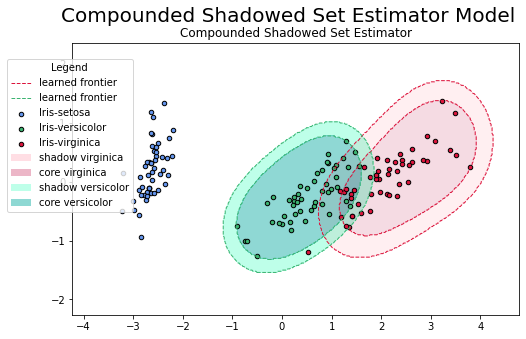

In [10]:
X, y, iris_labels = load_iris(d=2)

models = [csse]

labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
label_colors = ['cornflowerblue', 'mediumseagreen', 'crimson']

titles = [r'Compounded Shadowed Set Estimator']

suptitle = 'Compounded Shadowed Set Estimator Model'
contourf_levels = [-2, -1, 0, 1]
contourf1_colors = ['white', 'pink', 'palevioletred', 'red']
contourf2_colors = ['white', 'aquamarine', 'lightseagreen', 'red']
contour_levels = [-1, 0]
line1_colors = 'crimson'
line2_colors = 'mediumseagreen'

plot_compounded_shadowed_set(1, 1, X, iris_labels, labels, label_colors, models,
                  titles, suptitle, contourf_levels, contourf1_colors, contourf2_colors, contour_levels, line1_colors, line2_colors, 0.5)

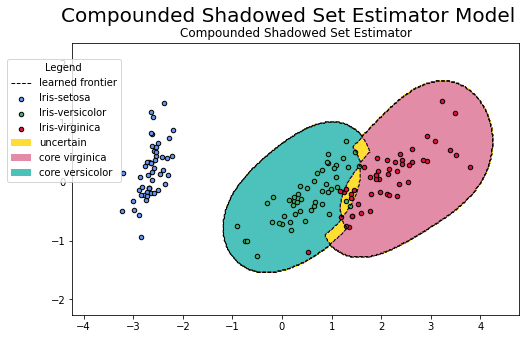

In [11]:
contourf_levels = [-2, -1, 0, 1, 2]
contourf_colors = ['white', 'gold', 'palevioletred', 'lightseagreen', 'red']
area_labels = ["uncertain", "core virginica", "core versicolor"]

plot_shadowed_set(1, 1, X, iris_labels, labels, label_colors, models,
                      titles, suptitle, contourf_levels, contourf_colors, contour_levels, area_labels)

In [12]:
logging.info('Finished Compounded Gurobi Two Phases Model on Iris dataset')